In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
df=pd.read_csv('annotated_points_np_103.csv')
df.head()

,x,y,labels
0,14.032258,29.561688,2.0
1,17.056452,29.318182,2.0
2,20.262097,27.451299,2.0
3,23.225806,28.344156,2.0
4,24.979839,25.259740,2.0


In [29]:
df.labels[df.labels==2]=-1

In [30]:
x = np.array(df['x'])
y = np.array(df['y'])
labels = np.array(df['labels'])


In [31]:
def perceptron_train(x, y, labels, max_iter=7000):
    x_train = np.c_[x, y]
    
    # Initialize weights
    w = np.zeros(x_train.shape[1])
    bias=0
    
    for t in range(max_iter):
        misclassified = False
        
        for i in range(len(x_train)):
            if labels[i] * (np.dot(w, x_train[i])+bias) <= 0:
                w = w + labels[i] * x_train[i]
                bias=bias+labels[i]
                misclassified = True
                # print(w)
        
        if not misclassified:
            return w, bias
    
    return w, bias

    

Extra

In [32]:
x_train = np.array(df['x'])
y_train = np.array(df['y'])
labels = np.array(df['labels'])


weights, bias = perceptron_train(x_train, y_train, labels)
# print("Learned weights:", weights)
# print("Learned bias:", bias)

Extra

In [33]:
def plot_classification_line(x, y, labels, weights, bias):
    plt.scatter(x, y, c=labels, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    
    # Plot the classification line
    x_values = np.linspace(min(x), max(x), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    
    plt.plot(x_values, y_values, color='blue', linestyle='-', linewidth=2.5)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('perceptron learning algorithm')
    plt.show()


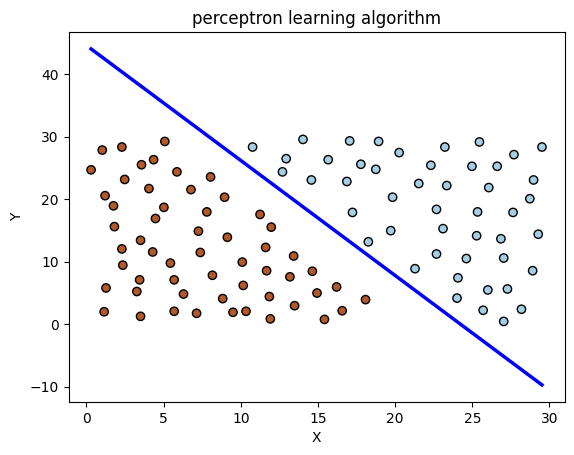

In [34]:
plot_classification_line(x_train, y_train, labels, weights, bias)